In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


In [7]:

data = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\drmaths\Credit Card Fraud Detection Project\creditcard_2023.csv')



In [9]:
print(data.head())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

In [11]:
print(data.tail())

            id        V1        V2        V3        V4        V5        V6  \
568625  568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454   
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098   
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148   
568629  568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493   

              V7        V8        V9  ...       V21       V22       V23  \
568625 -0.370393  0.189694 -0.938153  ...  0.167503  0.419731  1.288249   
568626 -0.016935 -0.147733  0.483894  ...  0.031874  0.388161 -0.154257   
568627 -0.070958 -0.019997 -0.122048  ...  0.140788  0.536523 -0.211100   
568628  0.580568 -0.207723  0.893527  ... -0.060381 -0.195609 -0.175488   
568629 -0.347613 -0.340814  0.253971  ...  0.534853 -0.291514  0.157303   

             V24       V25       V26       V27       V28    Amount  Class  
5686

In [13]:
# To drop 'id' and assign features and target
X = data.drop(columns=['id', 'Class'])
y = data['Class']

# Standardize the 'Amount' feature
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", np.bincount(y_train_res))

Class distribution after SMOTE: [227452 227452]


In [15]:
# Random Forest Classifier 
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Random Forest Accuracy:  0.9998329317834093


In [19]:
# XGBoost Classifier

xgb_model = xgb.XGBClassifier(scale_pos_weight=99, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost Accuracy: ", accuracy_score(y_test, y_pred_xgb))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

XGBoost Accuracy:  0.9992350034292949


In [21]:
# One-Class SVM for Anomaly Detection

#Since One-Class SVM is unsupervised, it assumes the majority class is the normal class (non-fraud). Let's fit it to non-fraud cases.

# Fit One-Class SVM on non-fraudulent transactions (Class 0)
oc_svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)
X_train_normal = X_train[y_train == 0]
oc_svm.fit(X_train_normal)

# Predict (fraudulent samples will be labeled as -1)
y_pred_svm = oc_svm.predict(X_test)
y_pred_svm = [1 if pred == -1 else 0 for pred in y_pred_svm]  # Convert -1 to 1 (fraud) and 1 to 0 (non-fraud)

print("One-Class SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("One-Class SVM Accuracy: ", accuracy_score(y_test, y_pred_svm))


One-Class SVM Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.95      0.85     56863
           1       0.93      0.71      0.80     56863

    accuracy                           0.83    113726
   macro avg       0.85      0.83      0.83    113726
weighted avg       0.85      0.83      0.83    113726

One-Class SVM Accuracy:  0.8282011149605192


In [23]:
# Logistic Regression Model

# Logistic Regression with balanced class weights
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_log))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.97      0.96      0.96    113726
weighted avg       0.97      0.96      0.96    113726

Logistic Regression Accuracy:  0.9649420537080351


In [29]:
# Autoencoder for Anomaly Detection

# An Autoencoder can be trained on non-fraudulent transactions and used to detect anomalies (fraud). This uses Keras.

from keras.models import Model
from keras.layers import Input, Dense

# Train on normal (non-fraud) transactions
X_train_normal = X_train[y_train == 0]

# Define Autoencoder structure
input_dim = X_train_normal.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(14, activation='relu')(input_layer)
encoded = Dense(7, activation='relu')(encoded)
decoded = Dense(14, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train autoencoder
autoencoder.fit(X_train_normal, X_train_normal, epochs=50, batch_size=256, shuffle=True, validation_split=0.1)

# Evaluate autoencoder on test data
reconstructed = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructed, 2), axis=1)
threshold = np.percentile(mse, 95)  # Set threshold for anomaly detection
y_pred_auto = [1 if e > threshold else 0 for e in mse]  # 1 for fraud, 0 for non-fraud

print("Autoencoder Classification Report:\n", classification_report(y_test, y_pred_auto))
print("Autoencoder Accuracy: ", accuracy_score(y_test, y_pred_auto))


Epoch 1/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.6668 - val_loss: 0.4739
Epoch 2/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4707 - val_loss: 0.4550
Epoch 3/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4589 - val_loss: 0.4454
Epoch 4/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4643 - val_loss: 0.4416
Epoch 5/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4474 - val_loss: 0.4395
Epoch 6/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4437 - val_loss: 0.4378
Epoch 7/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4638 - val_loss: 0.4364
Epoch 8/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4656 - val_loss: 0.4353
Epoch 9/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4552 - val_loss: 0.4344
Epoch 10/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4398 - val_loss: 0.4336
Epoch 11/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4385 - val_loss: 0.4330
Epoch 12/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/ste

In [31]:
#Ensemble with Voting Classifier

#We can combine Random Forest, XGBoost, and Logistic Regression into an ensemble using a Voting Classifier.

# Combine Random Forest, XGBoost, and Logistic Regression into a Voting Classifier
voting_clf = VotingClassifier(estimators=[('rf', rf_model), ('xgb', xgb_model), ('log', log_reg)], voting='hard')
voting_clf.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred_voting = voting_clf.predict(X_test)
print("Voting Classifier Classification Report:\n", classification_report(y_test, y_pred_voting))
print("Voting Classifier Accuracy: ", accuracy_score(y_test, y_pred_voting))


Voting Classifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Voting Classifier Accuracy:  0.9995867259905387


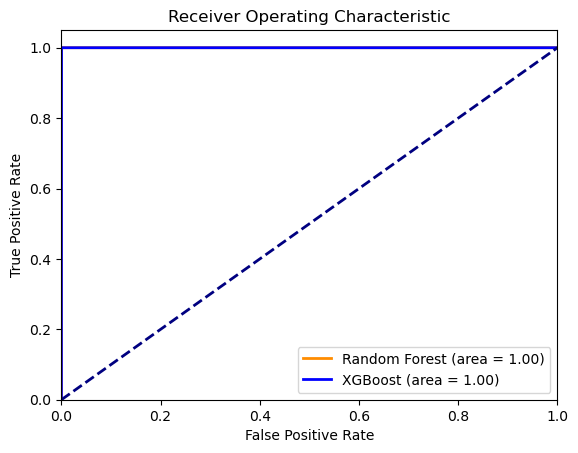

In [33]:
# Evaluate Performance with ROC Curves

# Plot the ROC curve for each model to visualize how well each performs.
                           
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Compute ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label='XGBoost (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


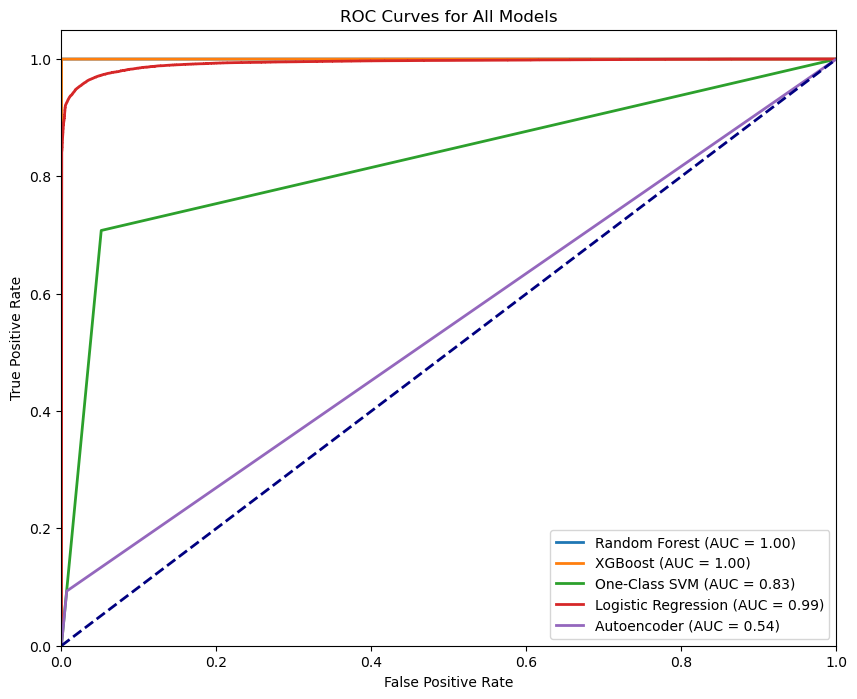

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curves for each model
def plot_roc_curve(fpr, tpr, auc_score, model_name):
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {auc_score:.2f})')

# Evaluate and Plot ROC Curves for All Models
def evaluate_and_plot_roc_curves(X_test, y_test, models):
    plt.figure(figsize=(10, 8))

    for model_name, model in models.items():
        if model_name in ['One-Class SVM', 'Autoencoder']:  # Custom handling for anomaly detection models
            if model_name == 'One-Class SVM':
                # One-Class SVM special handling (already trained on non-fraud)
                y_pred_svm = model.predict(X_test)
                y_pred_svm = [1 if pred == -1 else 0 for pred in y_pred_svm]  # Convert -1 to 1 (fraud), 1 to 0 (non-fraud)
                fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
                auc_svm = auc(fpr_svm, tpr_svm)
                plot_roc_curve(fpr_svm, tpr_svm, auc_svm, model_name)
            elif model_name == 'Autoencoder':
                # Autoencoder special handling
                reconstructed = model.predict(X_test)
                mse = np.mean(np.power(X_test - reconstructed, 2), axis=1)
                threshold = np.percentile(mse, 95)  # Set threshold for anomaly detection
                y_pred_auto = [1 if e > threshold else 0 for e in mse]
                fpr_auto, tpr_auto, _ = roc_curve(y_test, y_pred_auto)
                auc_auto = auc(fpr_auto, tpr_auto)
                plot_roc_curve(fpr_auto, tpr_auto, auc_auto, model_name)
        else:
            # For other models like Random Forest, XGBoost, Logistic Regression
            y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability estimates for class 1
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            auc_score = auc(fpr, tpr)
            plot_roc_curve(fpr, tpr, auc_score, model_name)

    # Plot ROC curve with all models
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for All Models')
    plt.legend(loc="lower right")
    plt.show()

# Assuming your models are already trained and stored in a dictionary
models = {
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'One-Class SVM': oc_svm,
    'Logistic Regression': log_reg,
    'Autoencoder': autoencoder
}

# Run the function to evaluate and plot ROC curves for all models
evaluate_and_plot_roc_curves(X_test, y_test, models)


In [ ]:
# Summary:
# Random Forest and XGBoost are strong baseline models for fraud detection with imbalanced data.
# One-Class SVM and Autoencoders are useful for unsupervised or anomaly detection approaches.
# Logistic Regression with class weighting provides a simpler, interpretable solution.
# VotingClassifier combines multiple models for better prediction accuracy.

# This project provides a comprehensive fraud detection approach using multiple models, handling class imbalance, and including both supervised and unsupervised methods. One can choose the model that best fits your needs based on the performance metrics (e.g., accuracy, precision, recall, F1-score).